# Exploratory Data Analysis (EDA) and Data Visualization

## Import and Reading Data

In [1]:
import pandas as pd
import numpy as np

import requests
from io import BytesIO

import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)

In [65]:
# URL do arquivo raw no GitHub
url = 'https://github.com/SabrinaLameiras/portoseguro/raw/main/Data/base_ataque.xlsx'

# Faz o download do conteúdo do arquivo
response = requests.get(url)
response.raise_for_status()   

# Lê o arquivo a partir do conteúdo baixado
df = pd.read_excel(BytesIO(response.content))

# Mostra as primeiras linhas do DataFrame
print(df.head(5))

   id.orig_p  id.resp_p proto service  flow_duration  fwd_pkts_tot  \
0      50078      20309   udp       -       0.000000             1   
1      15392         21   tcp       -       0.000000             1   
2      36504         21   tcp       -       0.000004             1   
3       1793         21   tcp       -       0.000005             1   
4      27696         21   tcp       -       0.000000             1   

   bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  fwd_pkts_per_sec  \
0             0                  0                  0          0.000000   
1             0                  1                  0          0.000000   
2             1                  1                  0     246723.764706   
3             1                  1                  0     199728.761905   
4             0                  1                  0          0.000000   

   bwd_pkts_per_sec  flow_pkts_per_sec  down_up_ratio  fwd_header_size_tot  \
0          0.000000           0.000000            

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94719 entries, 0 to 94718
Data columns (total 84 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id.orig_p                 94719 non-null  int64  
 1   id.resp_p                 94719 non-null  int64  
 2   proto                     94719 non-null  object 
 3   service                   94719 non-null  object 
 4   flow_duration             94719 non-null  float64
 5   fwd_pkts_tot              94719 non-null  int64  
 6   bwd_pkts_tot              94719 non-null  int64  
 7   fwd_data_pkts_tot         94719 non-null  int64  
 8   bwd_data_pkts_tot         94719 non-null  int64  
 9   fwd_pkts_per_sec          94719 non-null  float64
 10  bwd_pkts_per_sec          94719 non-null  float64
 11  flow_pkts_per_sec         94719 non-null  float64
 12  down_up_ratio             94719 non-null  float64
 13  fwd_header_size_tot       94719 non-null  int64  
 14  fwd_he

In [67]:
df.describe()

,id.orig_p,id.resp_p,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,down_up_ratio,fwd_header_size_tot,fwd_header_size_min,fwd_header_size_max,bwd_header_size_tot,bwd_header_size_min,bwd_header_size_max,flow_FIN_flag_count,flow_SYN_flag_count,flow_RST_flag_count,fwd_PSH_flag_count,bwd_PSH_flag_count,flow_ACK_flag_count,fwd_URG_flag_count,bwd_URG_flag_count,flow_CWR_flag_count,flow_ECE_flag_count,fwd_pkts_payload.min,fwd_pkts_payload.max,fwd_pkts_payload.tot,fwd_pkts_payload.avg,fwd_pkts_payload.std,bwd_pkts_payload.min,bwd_pkts_payload.max,bwd_pkts_payload.tot,bwd_pkts_payload.avg,bwd_pkts_payload.std,flow_pkts_payload.min,flow_pkts_payload.max,flow_pkts_payload.tot,flow_pkts_payload.avg,flow_pkts_payload.std,fwd_iat.min,fwd_iat.max,fwd_iat.tot,fwd_iat.avg,fwd_iat.std,bwd_iat.min,bwd_iat.max,bwd_iat.tot,bwd_iat.avg,bwd_iat.std,flow_iat.min,flow_iat.max,flow_iat.tot,flow_iat.avg,flow_iat.std,payload_bytes_per_second,fwd_subflow_pkts,bwd_subflow_pkts,fwd_subflow_bytes,bwd_subflow_bytes,fwd_bulk_bytes,bwd_bulk_bytes,fwd_bulk_packets,bwd_bulk_packets,fwd_bulk_rate,bwd_bulk_rate,active.min,active.max,active.tot,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size
count,94719.000000,94719.000000,94719.000000,94719.000000,94719.000000,94719.000000,94719.000000,9.471900e+04,9.471900e+04,9.471900e+04,94719.000000,94719.000000,94719.000000,94719.000000,94719.000000,94719.000000,94719.000000,94719.000000,94719.000000,94719.000000,94719.000000,94719.000000,94719.000000,94719.000000,94719.0,94719.000000,94719.000000,94719.000000,94719.000000,94719.000000,94719.000000,94719.000000,94719.000000,94719.000000,9.471900e+04,94719.000000,94719.000000,94719.000000,94719.000000,9.471900e+04,94719.000000,94719.000000,9.471900e+04,9.471900e+04,9.471900e+04,9.471900e+04,9.471900e+04,9.471900e+04,9.471900e+04,9.471900e+04,9.471900e+04,9.471900e+04,9.471900e+04,9.471900e+04,9.471900e+04,9.471900e+04,9.471900e+04,9.471900e+04,94719.000000,94719.000000,94719.000000,9.471900e+04,94719.000000,9.471900e+04,94719.000000,94719.000000,9.471900e+04,9.471900e+04,9.471900e+04,9.471900e+04,9.471900e+04,9.471900e+04,9.471900e+04,9.471900e+04,9.471900e+04,9.471900e+04,9.471900e+04,9.471900e+04,94719.000000,94719.000000,94719.000000
mean,35821.499720,1312.111002,4.951723,2.649236,2.213072,1.612496,1.066185,3.233888e+05,3.233311e+05,6.467199e+05,0.841850,64.053759,19.713257,20.840507,55.227610,17.622737,18.580390,0.150266,0.936137,0.766309,0.456667,0.511650,3.211626,0.021178,0.0,0.001309,0.000908,89.137333,120.973733,251.955869,94.684615,10.538584,4.962067,68.116714,6.668017e+02,24.419306,26.715092,13.912541,157.058848,9.187575e+02,64.659467,76.020277,1.149459e+04,2.237714e+06,4.913565e+06,3.085204e+05,7.507167e+05,4.893600e+03,5.299685e+05,2.313528e+06,1.139314e+05,1.916968e+05,5.566389e+03,2.243475e+06,4.953035e+06,1.815239e+05,5.850930e+05,3.729457e+07,1.717126,1.469851,141.420276,2.827325e+02,25.021321,2.017748e+02,0.031383,0.170422,4.985753e+03,6.292994e+04,1.730752e+05,2.321325e+05,3.807545e+05,1.925475e+05,3.059239e+04,2.101349e+06,2.212224e+06,4.572280e+06,2.164169e+06,5.914388e+04,7934.245188,3561.196845,957.813269
std,18805.666288,5960.595636,148.199417,25.453482,37.638331,22.384053,36.814604,3.664393e+05,3.664835e+05,7.329195e+05,0.346090,447.588494,6.095522,8.233802,1172.136593,8.487314,10.189775,0.536730,0.539833,0.465384,4.499888,6.844645,47.477197,0.143980,0.0,0.050946,0.035878,49.443812,138.292418,5495.348550,51.130200,51.101996,22.231259,261.672968,4.838620e+04,94.453286,105.706290,35.158071,248.168218,4.898380e+04,56.595743,83.199632,1.398339e+06,1.046700e+07,1.481564e+08,2.155797e+06,3.635958e+06,2.580095e+05,4.882822e+06,1.039843e+08,1.250006e+06,2.032747e+06,2.901316e+05,1.049097e+07,1.481997e+08,9.935405e+05,2.843477e+06,4.433043e+07,3.078382,6.841469,488.884566,8.641711e+03,2251.219548,2.2337

In [75]:
df_object_cols = df.select_dtypes("object")
df_object_cols.head()

,proto,service,Attack_type
0,udp,-,NaN
1,tcp,-,DOS_SYN_Hping
2,tcp,-,NaN
3,tcp,-,DOS_SYN_Hping
4,tcp,-,DOS_SYN_Hping


In [77]:
df_object_cols.nunique()

proto           3
service        10
Attack_type    12
dtype: int64

In [78]:
for i in df_object_cols.columns:
    print(df[i].value_counts())

tcp     82029
udp     12633
icmp       57
Name: proto, dtype: int64
-         74463
dns        9753
mqtt       4132
http       3464
ssl        2663
ntp         121
dhcp         50
irc          43
ssh          28
radius        2
Name: service, dtype: int64
DOS_SYN_Hping                 19878
Thing_Speak                    2432
ARP_poisioning                 2325
MQTT_Publish                   1244
NMAP_UDP_SCAN                   777
NMAP_XMAS_TREE_SCAN             603
NMAP_OS_DETECTION               600
NMAP_TCP_scan                   301
DDOS_Slowloris                  160
Wipro_bulb                       76
Metasploit_Brute_Force_SSH       11
NMAP_FIN_SCAN                     8
Name: Attack_type, dtype: int64


In [73]:
# Definição de um limiar para a coluna fwd_pkts_tot baseado em uma métrica estatística ou um valor fixo
# Utilizeo o percentil 90 dos dados como um exemplo de limiar
# Este valor será ajustado conforme a necessidade ou distribuição real dos dados
#limiar_fwd_pkts_tot = df['fwd_pkts_tot'].quantile(0.90)

In [74]:
# Lista de ataques específicos
ataques = [
    'DOS_SYN_Hping', 'ARP_poisioning', 'NMAP_UDP_SCAN', 'NMAP_XMAS_TREE_SCAN', 
    'NMAP_OS_DETECTION', 'NMAP_TCP_scan', 'DDOS_Slowloris', 
    'Metasploit_Brute_Force_SSH', 'NMAP_FIN_SCAN'
]

# Definindo o limiar para fwd_pkts_tot
limiar = df['fwd_pkts_tot'].quantile(0.75)  

# Função para determinar se é ataque ou não
def verificar_ataque(row):
    if row['attack_type'] in ['Thing_Speak', 'MQTT_Publish']:
        return 0
    elif row['attack_type'] in ataques:
        return 1
    else:
        return 1 if row['fwd_pkts_tot'] > limiar else 0

# Aplicando a função ao DataFrame
df['is_attack'] = df.apply(verificar_ataque, axis=1)

# Mostrando o DataFrame resultante
print(df)


KeyError: 'attack_type'

In [55]:
# contagem de ocorrências da nova coluna 'is_attack':
attack_counts = df['is_attack'].value_counts()
print(attack_counts)

KeyError: 'is_attack'

In [5]:
# Dado que o Wipro_bulb aparece tanto na categoria de ataque quanto na de normal, e considerando
# que não há critérios claros da área de negócios, uma estratégia seria analisar as características
# do tráfego Wipro_bulb para identificar padrões ou diferenças estatísticas que possam distinguir 
# entre os que são ataques e os que são normais.

## Data Understanding

In [8]:
df.shape

(94719, 84)

In [9]:
df.head(5)

,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,down_up_ratio,fwd_header_size_tot,fwd_header_size_min,fwd_header_size_max,bwd_header_size_tot,bwd_header_size_min,bwd_header_size_max,flow_FIN_flag_count,flow_SYN_flag_count,flow_RST_flag_count,fwd_PSH_flag_count,bwd_PSH_flag_count,flow_ACK_flag_count,fwd_URG_flag_count,bwd_URG_flag_count,flow_CWR_flag_count,flow_ECE_flag_count,fwd_pkts_payload.min,fwd_pkts_payload.max,fwd_pkts_payload.tot,fwd_pkts_payload.avg,fwd_pkts_payload.std,bwd_pkts_payload.min,bwd_pkts_payload.max,bwd_pkts_payload.tot,bwd_pkts_payload.avg,bwd_pkts_payload.std,flow_pkts_payload.min,flow_pkts_payload.max,flow_pkts_payload.tot,flow_pkts_payload.avg,flow_pkts_payload.std,fwd_iat.min,fwd_iat.max,fwd_iat.tot,fwd_iat.avg,fwd_iat.std,bwd_iat.min,bwd_iat.max,bwd_iat.tot,bwd_iat.avg,bwd_iat.std,flow_iat.min,flow_iat.max,flow_iat.tot,flow_iat.avg,flow_iat.std,payload_bytes_per_second,fwd_subflow_pkts,bwd_subflow_pkts,fwd_subflow_bytes,bwd_subflow_bytes,fwd_bulk_bytes,bwd_bulk_bytes,fwd_bulk_packets,bwd_bulk_packets,fwd_bulk_rate,bwd_bulk_rate,active.min,active.max,active.tot,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,50078,20309,udp,-,0.000000,1,0,0,0,0.000000,0.000000,0.000000,0.0,8,8,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
1,15392,21,tcp,-,0.000000,1,0,1,0,0.000000,0.000000,0.000000,0.0,20,20,20,0,0,0,0,1,0,0,0,0,0,0,0,0,120,120,120,120.0,0.0,0,0,0,0.0,0.0,120,120,120,120.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,1.0,0.0,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,64,0,64,DOS_SYN_Hping
2,36504,21,tcp,-,0.000004,1,1,1,0,246723.764706,246723.764706,493447.529412,1.0,20,20,20,20,20,20,0,1,1,0,0,1,0,0,0,0,120,120,120,120.0,0.0,0,0,0,0.0,0.0,0,120,120,60.0,84.852814,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.053116,4.053116,4.053116,4.053116,0.0,2.960685e+07,1.0,1.0,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.053116,4.053116,4.053116,4.053116,0.0,0.0,0.0,0.0,0.0,0.0,64,0,64,NaN
3,1793,21,tcp,-,0.000005,1,1,1,0,199728.761905,199728.761905,399457.523810,1.0,20,20,20,20,20,20,0,1,1,0,0,1,0,0,0,0,120,120,120,120.0,0.0,0,0,0,0.0,0.0,0,120,120,60.0,84.852814,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.006790,5.006790,5.006790,5.006790,0.0,2.396745e+07,1.0,1.0,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.006790,5.006790,5.006790,5.006790,0.0,0.0,0.0,0.0,0.0,0.0,64,0,64,DOS_SYN_Hping
4,27696,21,tcp,-,0.000000,1,0,1,0,0.000000,0.000000,0.000000,0.0,20,20,20,0,0,0,0,1,0,0,0,0,0,0,0,0,120,120,120,120.0,0.0,0,0,0,0.0,0.0,120,120,120,120.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,1.0,0.0,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,64,0,64,DOS_SYN_Hping


In [10]:
df.tail(5)

,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,down_up_ratio,fwd_header_size_tot,fwd_header_size_min,fwd_header_size_max,bwd_header_size_tot,bwd_header_size_min,bwd_header_size_max,flow_FIN_flag_count,flow_SYN_flag_count,flow_RST_flag_count,fwd_PSH_flag_count,bwd_PSH_flag_count,flow_ACK_flag_count,fwd_URG_flag_count,bwd_URG_flag_count,flow_CWR_flag_count,flow_ECE_flag_count,fwd_pkts_payload.min,fwd_pkts_payload.max,fwd_pkts_payload.tot,fwd_pkts_payload.avg,fwd_pkts_payload.std,bwd_pkts_payload.min,bwd_pkts_payload.max,bwd_pkts_payload.tot,bwd_pkts_payload.avg,bwd_pkts_payload.std,flow_pkts_payload.min,flow_pkts_payload.max,flow_pkts_payload.tot,flow_pkts_payload.avg,flow_pkts_payload.std,fwd_iat.min,fwd_iat.max,fwd_iat.tot,fwd_iat.avg,fwd_iat.std,bwd_iat.min,bwd_iat.max,bwd_iat.tot,bwd_iat.avg,bwd_iat.std,flow_iat.min,flow_iat.max,flow_iat.tot,flow_iat.avg,flow_iat.std,payload_bytes_per_second,fwd_subflow_pkts,bwd_subflow_pkts,fwd_subflow_bytes,bwd_subflow_bytes,fwd_bulk_bytes,bwd_bulk_bytes,fwd_bulk_packets,bwd_bulk_packets,fwd_bulk_rate,bwd_bulk_rate,active.min,active.max,active.tot,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
94714,46600,4900,tcp,-,0.000006,1,1,0,0,1.677722e+05,1.677722e+05,3.355443e+05,1.0,20,20,20,20,20,20,0,0,1,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.960464,5.960464,5.960464,5.960464,0.0,0.000000e+00,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.960464,5.960464,5.960464,5.960464,0.0,0.0,0.0,0.0,0.0,0.0,1024,0,1024,NaN
94715,5543,21,tcp,-,0.000004,1,1,1,0,2.467238e+05,2.467238e+05,4.934475e+05,1.0,20,20,20,20,20,20,0,1,1,0,0,1,0,0,0,0,120,120,120,120.0,0.0,0,0,0,0.0,0.0,0,120,120,60.0,84.852814,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.053116,4.053116,4.053116,4.053116,0.0,2.960685e+07,1.0,1.0,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.053116,4.053116,4.053116,4.053116,0.0,0.0,0.0,0.0,0.0,0.0,64,0,64,NaN
94716,51036,4001,tcp,-,0.000006,1,1,0,0,1.677722e+05,1.677722e+05,3.355443e+05,1.0,20,20,20,20,20,20,0,0,1,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.960464,5.960464,5.960464,5.960464,0.0,0.000000e+00,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.960464,5.960464,5.960464,5.960464,0.0,0.0,0.0,0.0,0.0,0.0,1024,0,1024,NaN
94717,2893,21,tcp,-,0.000001,1,1,1,0,1.048576e+06,1.048576e+06,2.097152e+06,1.0,20,20,20,20,20,20,0,1,1,0,0,1,0,0,0,0,120,120,120,120.0,0.0,0,0,0,0.0,0.0,0,120,120,60.0,84.852814,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.953674,0.953674,0.953674,0.953674,0.0,1.258291e+08,1.0,1.0,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.953674,0.953674,0.953674,0.953674,0.0,0.0,0.0,0.0,0.0,0.0,64,0,64,DOS_SYN_Hping
94718,54261,21,tcp,-,0.000004,1,1,1,0,2.467238e+05,2.467238e+05,4.934475e+05,1.0,20,20,20,20,20,20,0,1,1,0,0,1,0,0,0,0,120,120,120,120.0,0.0,0,0,0,0.0,0.0,0,120,120,60.0,84.852814,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.053116,4.053116,4.053116,4.053116,0.0,2.960685e+07,1.0,1.0,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.053116,4.053116,4.053116,4.053116,0.0,0.0,0.0,0.0,0.0,0.0,64,0,64,NaN


In [11]:
# Exploração inicial: contagem de valores para a coluna Attack_type
print("Contagem de valores para Attack_type:")
print(df['Attack_type'].value_counts())

Contagem de valores para Attack_type:
DOS_SYN_Hping                 19878
Thing_Speak                    2432
ARP_poisioning                 2325
MQTT_Publish                   1244
NMAP_UDP_SCAN                   777
NMAP_XMAS_TREE_SCAN             603
NMAP_OS_DETECTION               600
NMAP_TCP_scan                   301
DDOS_Slowloris                  160
Wipro_bulb                       76
Metasploit_Brute_Force_SSH       11
NMAP_FIN_SCAN                     8
Name: Attack_type, dtype: int64


In [80]:
# Análise estatística básica para variáveis numéricas
df.describe()

,id.orig_p,id.resp_p,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,down_up_ratio,fwd_header_size_tot,fwd_header_size_min,fwd_header_size_max,bwd_header_size_tot,bwd_header_size_min,bwd_header_size_max,flow_FIN_flag_count,flow_SYN_flag_count,flow_RST_flag_count,fwd_PSH_flag_count,bwd_PSH_flag_count,flow_ACK_flag_count,fwd_URG_flag_count,bwd_URG_flag_count,flow_CWR_flag_count,flow_ECE_flag_count,fwd_pkts_payload.min,fwd_pkts_payload.max,fwd_pkts_payload.tot,fwd_pkts_payload.avg,fwd_pkts_payload.std,bwd_pkts_payload.min,bwd_pkts_payload.max,bwd_pkts_payload.tot,bwd_pkts_payload.avg,bwd_pkts_payload.std,flow_pkts_payload.min,flow_pkts_payload.max,flow_pkts_payload.tot,flow_pkts_payload.avg,flow_pkts_payload.std,fwd_iat.min,fwd_iat.max,fwd_iat.tot,fwd_iat.avg,fwd_iat.std,bwd_iat.min,bwd_iat.max,bwd_iat.tot,bwd_iat.avg,bwd_iat.std,flow_iat.min,flow_iat.max,flow_iat.tot,flow_iat.avg,flow_iat.std,payload_bytes_per_second,fwd_subflow_pkts,bwd_subflow_pkts,fwd_subflow_bytes,bwd_subflow_bytes,fwd_bulk_bytes,bwd_bulk_bytes,fwd_bulk_packets,bwd_bulk_packets,fwd_bulk_rate,bwd_bulk_rate,active.min,active.max,active.tot,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size
count,94719.000000,94719.000000,94719.000000,94719.000000,94719.000000,94719.000000,94719.000000,9.471900e+04,9.471900e+04,9.471900e+04,94719.000000,94719.000000,94719.000000,94719.000000,94719.000000,94719.000000,94719.000000,94719.000000,94719.000000,94719.000000,94719.000000,94719.000000,94719.000000,94719.000000,94719.0,94719.000000,94719.000000,94719.000000,94719.000000,94719.000000,94719.000000,94719.000000,94719.000000,94719.000000,9.471900e+04,94719.000000,94719.000000,94719.000000,94719.000000,9.471900e+04,94719.000000,94719.000000,9.471900e+04,9.471900e+04,9.471900e+04,9.471900e+04,9.471900e+04,9.471900e+04,9.471900e+04,9.471900e+04,9.471900e+04,9.471900e+04,9.471900e+04,9.471900e+04,9.471900e+04,9.471900e+04,9.471900e+04,9.471900e+04,94719.000000,94719.000000,94719.000000,9.471900e+04,94719.000000,9.471900e+04,94719.000000,94719.000000,9.471900e+04,9.471900e+04,9.471900e+04,9.471900e+04,9.471900e+04,9.471900e+04,9.471900e+04,9.471900e+04,9.471900e+04,9.471900e+04,9.471900e+04,9.471900e+04,94719.000000,94719.000000,94719.000000
mean,35821.499720,1312.111002,4.951723,2.649236,2.213072,1.612496,1.066185,3.233888e+05,3.233311e+05,6.467199e+05,0.841850,64.053759,19.713257,20.840507,55.227610,17.622737,18.580390,0.150266,0.936137,0.766309,0.456667,0.511650,3.211626,0.021178,0.0,0.001309,0.000908,89.137333,120.973733,251.955869,94.684615,10.538584,4.962067,68.116714,6.668017e+02,24.419306,26.715092,13.912541,157.058848,9.187575e+02,64.659467,76.020277,1.149459e+04,2.237714e+06,4.913565e+06,3.085204e+05,7.507167e+05,4.893600e+03,5.299685e+05,2.313528e+06,1.139314e+05,1.916968e+05,5.566389e+03,2.243475e+06,4.953035e+06,1.815239e+05,5.850930e+05,3.729457e+07,1.717126,1.469851,141.420276,2.827325e+02,25.021321,2.017748e+02,0.031383,0.170422,4.985753e+03,6.292994e+04,1.730752e+05,2.321325e+05,3.807545e+05,1.925475e+05,3.059239e+04,2.101349e+06,2.212224e+06,4.572280e+06,2.164169e+06,5.914388e+04,7934.245188,3561.196845,957.813269
std,18805.666288,5960.595636,148.199417,25.453482,37.638331,22.384053,36.814604,3.664393e+05,3.664835e+05,7.329195e+05,0.346090,447.588494,6.095522,8.233802,1172.136593,8.487314,10.189775,0.536730,0.539833,0.465384,4.499888,6.844645,47.477197,0.143980,0.0,0.050946,0.035878,49.443812,138.292418,5495.348550,51.130200,51.101996,22.231259,261.672968,4.838620e+04,94.453286,105.706290,35.158071,248.168218,4.898380e+04,56.595743,83.199632,1.398339e+06,1.046700e+07,1.481564e+08,2.155797e+06,3.635958e+06,2.580095e+05,4.882822e+06,1.039843e+08,1.250006e+06,2.032747e+06,2.901316e+05,1.049097e+07,1.481997e+08,9.935405e+05,2.843477e+06,4.433043e+07,3.078382,6.841469,488.884566,8.641711e+03,2251.219548,2.2337

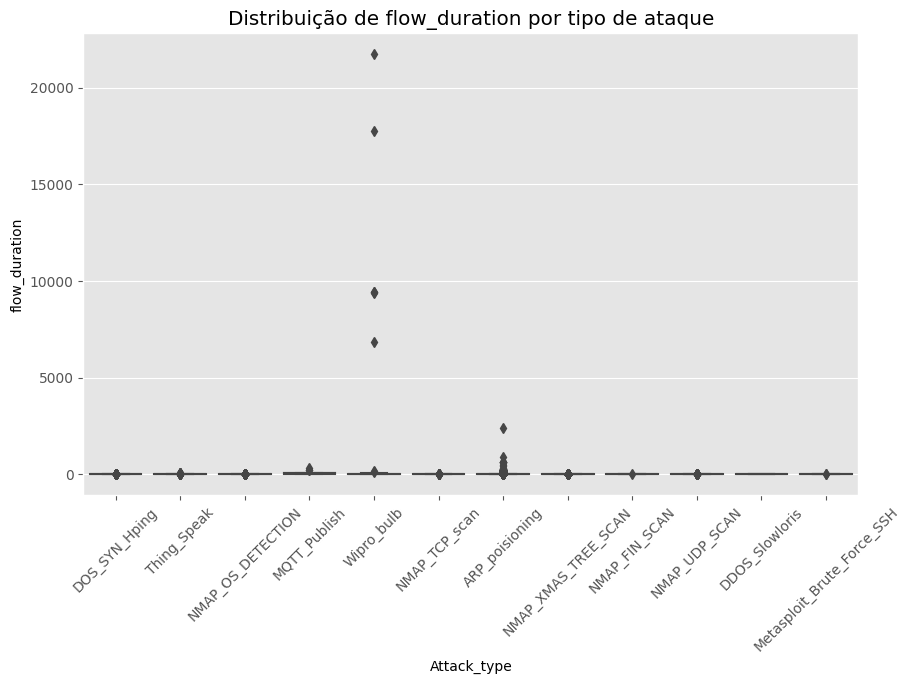

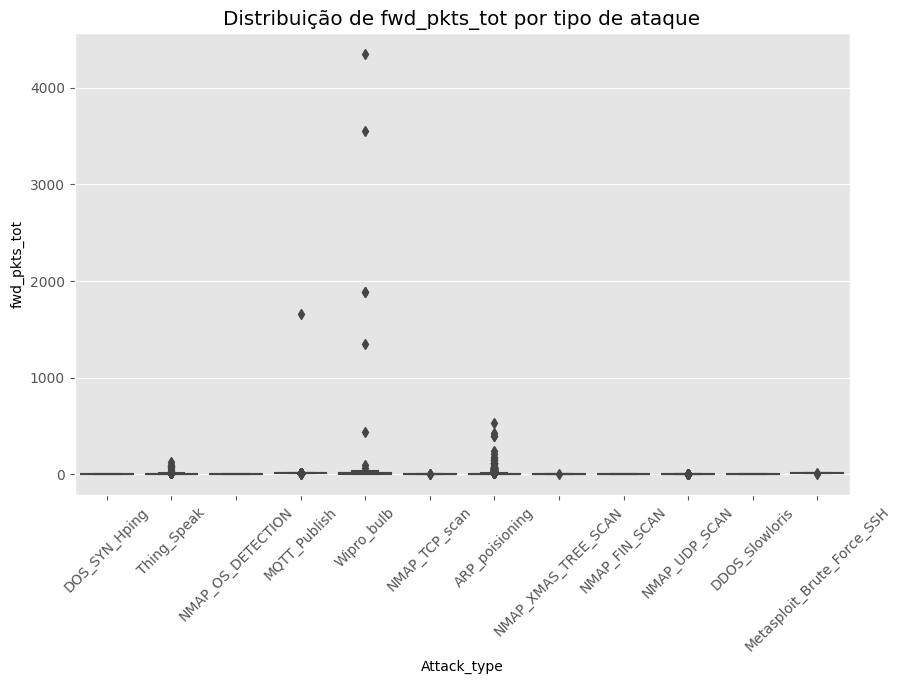

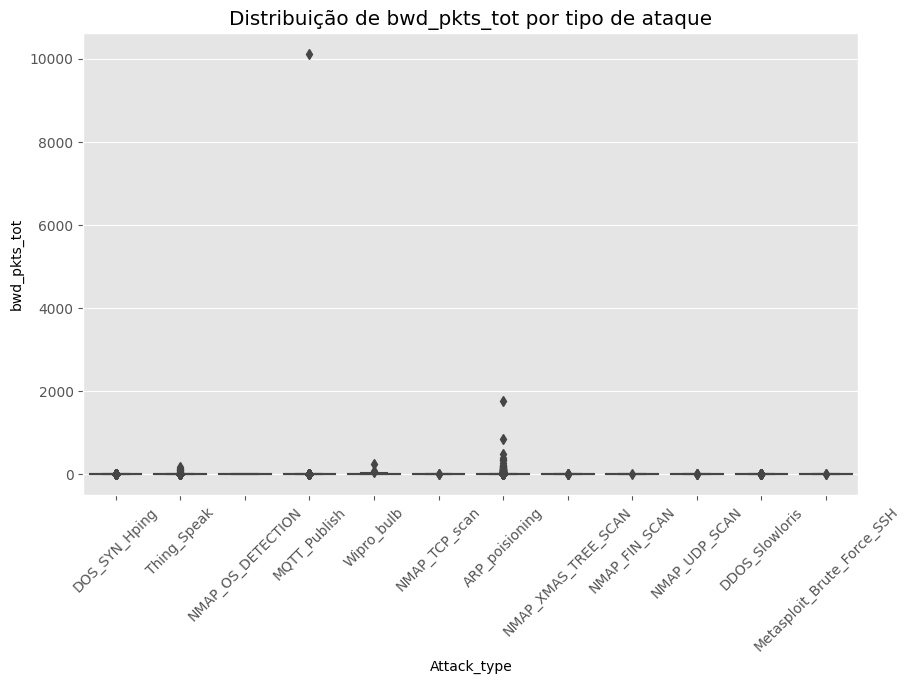

In [14]:
# Boxplots para entender a distribuição de variáveis numéricas por tipo de ataque
for var in num_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Attack_type', y=var, data=df)
    plt.title(f"Distribuição de {var} por tipo de ataque")
    plt.xticks(rotation=45)
    plt.show()

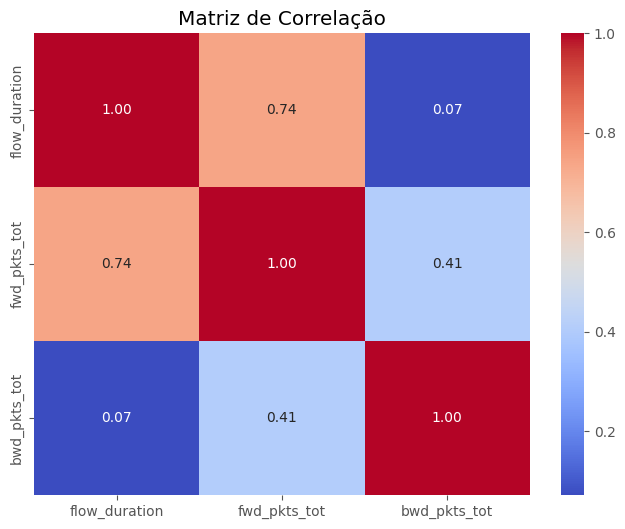

In [15]:
# Correlação entre as variáveis numéricas
correlation_matrix = df[num_vars].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlação")
plt.show()

In [16]:
max_width = max(map(len, df.columns))   

for col, dtype in zip(df.columns, df.dtypes):
    print(f"{col.ljust(max_width)}: {str(dtype)}")

id.orig_p               : int64
id.resp_p               : int64
proto                   : object
service                 : object
flow_duration           : float64
fwd_pkts_tot            : int64
bwd_pkts_tot            : int64
fwd_data_pkts_tot       : int64
bwd_data_pkts_tot       : int64
fwd_pkts_per_sec        : float64
bwd_pkts_per_sec        : float64
flow_pkts_per_sec       : float64
down_up_ratio           : float64
fwd_header_size_tot     : int64
fwd_header_size_min     : int64
fwd_header_size_max     : int64
bwd_header_size_tot     : int64
bwd_header_size_min     : int64
bwd_header_size_max     : int64
flow_FIN_flag_count     : int64
flow_SYN_flag_count     : int64
flow_RST_flag_count     : int64
fwd_PSH_flag_count      : int64
bwd_PSH_flag_count      : int64
flow_ACK_flag_count     : int64
fwd_URG_flag_count      : int64
bwd_URG_flag_count      : int64
flow_CWR_flag_count     : int64
flow_ECE_flag_count     : int64
fwd_pkts_payload.min    : int64
fwd_pkts_payload.max    : in

In [17]:
df.describe()

,id.orig_p,id.resp_p,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,down_up_ratio,fwd_header_size_tot,fwd_header_size_min,fwd_header_size_max,bwd_header_size_tot,bwd_header_size_min,bwd_header_size_max,flow_FIN_flag_count,flow_SYN_flag_count,flow_RST_flag_count,fwd_PSH_flag_count,bwd_PSH_flag_count,flow_ACK_flag_count,fwd_URG_flag_count,bwd_URG_flag_count,flow_CWR_flag_count,flow_ECE_flag_count,fwd_pkts_payload.min,fwd_pkts_payload.max,fwd_pkts_payload.tot,fwd_pkts_payload.avg,fwd_pkts_payload.std,bwd_pkts_payload.min,bwd_pkts_payload.max,bwd_pkts_payload.tot,bwd_pkts_payload.avg,bwd_pkts_payload.std,flow_pkts_payload.min,flow_pkts_payload.max,flow_pkts_payload.tot,flow_pkts_payload.avg,flow_pkts_payload.std,fwd_iat.min,fwd_iat.max,fwd_iat.tot,fwd_iat.avg,fwd_iat.std,bwd_iat.min,bwd_iat.max,bwd_iat.tot,bwd_iat.avg,bwd_iat.std,flow_iat.min,flow_iat.max,flow_iat.tot,flow_iat.avg,flow_iat.std,payload_bytes_per_second,fwd_subflow_pkts,bwd_subflow_pkts,fwd_subflow_bytes,bwd_subflow_bytes,fwd_bulk_bytes,bwd_bulk_bytes,fwd_bulk_packets,bwd_bulk_packets,fwd_bulk_rate,bwd_bulk_rate,active.min,active.max,active.tot,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size
count,94719.000000,94719.000000,94719.000000,94719.000000,94719.000000,94719.000000,94719.000000,9.471900e+04,9.471900e+04,9.471900e+04,94719.000000,94719.000000,94719.000000,94719.000000,94719.000000,94719.000000,94719.000000,94719.000000,94719.000000,94719.000000,94719.000000,94719.000000,94719.000000,94719.000000,94719.0,94719.000000,94719.000000,94719.000000,94719.000000,94719.000000,94719.000000,94719.000000,94719.000000,94719.000000,9.471900e+04,94719.000000,94719.000000,94719.000000,94719.000000,9.471900e+04,94719.000000,94719.000000,9.471900e+04,9.471900e+04,9.471900e+04,9.471900e+04,9.471900e+04,9.471900e+04,9.471900e+04,9.471900e+04,9.471900e+04,9.471900e+04,9.471900e+04,9.471900e+04,9.471900e+04,9.471900e+04,9.471900e+04,9.471900e+04,94719.000000,94719.000000,94719.000000,9.471900e+04,94719.000000,9.471900e+04,94719.000000,94719.000000,9.471900e+04,9.471900e+04,9.471900e+04,9.471900e+04,9.471900e+04,9.471900e+04,9.471900e+04,9.471900e+04,9.471900e+04,9.471900e+04,9.471900e+04,9.471900e+04,94719.000000,94719.000000,94719.000000
mean,35821.499720,1312.111002,4.951723,2.649236,2.213072,1.612496,1.066185,3.233888e+05,3.233311e+05,6.467199e+05,0.841850,64.053759,19.713257,20.840507,55.227610,17.622737,18.580390,0.150266,0.936137,0.766309,0.456667,0.511650,3.211626,0.021178,0.0,0.001309,0.000908,89.137333,120.973733,251.955869,94.684615,10.538584,4.962067,68.116714,6.668017e+02,24.419306,26.715092,13.912541,157.058848,9.187575e+02,64.659467,76.020277,1.149459e+04,2.237714e+06,4.913565e+06,3.085204e+05,7.507167e+05,4.893600e+03,5.299685e+05,2.313528e+06,1.139314e+05,1.916968e+05,5.566389e+03,2.243475e+06,4.953035e+06,1.815239e+05,5.850930e+05,3.729457e+07,1.717126,1.469851,141.420276,2.827325e+02,25.021321,2.017748e+02,0.031383,0.170422,4.985753e+03,6.292994e+04,1.730752e+05,2.321325e+05,3.807545e+05,1.925475e+05,3.059239e+04,2.101349e+06,2.212224e+06,4.572280e+06,2.164169e+06,5.914388e+04,7934.245188,3561.196845,957.813269
std,18805.666288,5960.595636,148.199417,25.453482,37.638331,22.384053,36.814604,3.664393e+05,3.664835e+05,7.329195e+05,0.346090,447.588494,6.095522,8.233802,1172.136593,8.487314,10.189775,0.536730,0.539833,0.465384,4.499888,6.844645,47.477197,0.143980,0.0,0.050946,0.035878,49.443812,138.292418,5495.348550,51.130200,51.101996,22.231259,261.672968,4.838620e+04,94.453286,105.706290,35.158071,248.168218,4.898380e+04,56.595743,83.199632,1.398339e+06,1.046700e+07,1.481564e+08,2.155797e+06,3.635958e+06,2.580095e+05,4.882822e+06,1.039843e+08,1.250006e+06,2.032747e+06,2.901316e+05,1.049097e+07,1.481997e+08,9.935405e+05,2.843477e+06,4.433043e+07,3.078382,6.841469,488.884566,8.641711e+03,2251.219548,2.2337

## Data Preparation

In [18]:
df = df[[
#   'id.orig_p', 'id.resp_p', 'proto', 'service', 'flow_duration', 'orig_bytes', 'resp_bytes', 
    'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_data_pkts_tot', 'bwd_data_pkts_tot',
    'fwd_pkts_per_sec', 'bwd_pkts_per_sec', 'flow_pkts_per_sec', 'down_up_ratio', 
    'fwd_header_size_tot', 'fwd_header_size_min','fwd_header_size_max', 'bwd_header_size_tot',
    'bwd_header_size_min', 'bwd_header_size_max',
#   'flow_FIN_flag_count', 'flow_SYN_flag_count', 'flow_RST_flag_count', 
#   'fwd_PSH_flag_count',  'bwd_PSH_flag_count', 'flow_ACK_flag_count',
#   'fwd_URG_flag_count', 'bwd_URG_flag_count', 'flow_CWR_flag_count',
#   'flow_ECE_flag_count', 
    'fwd_pkts_payload.min', 'fwd_pkts_payload.max', 'fwd_pkts_payload.tot', 'fwd_pkts_payload.avg', 'fwd_pkts_payload.std',
    'bwd_pkts_payload.min', 'bwd_pkts_payload.max', 'bwd_pkts_payload.tot', 'bwd_pkts_payload.avg', 'bwd_pkts_payload.std',
    'flow_pkts_payload.min', 'flow_pkts_payload.max', 'flow_pkts_payload.tot', 'flow_pkts_payload.avg','flow_pkts_payload.std', 
#   'fwd_iat.min', 'fwd_iat.max', 'fwd_iat.tot','fwd_iat.avg', 'fwd_iat.std', 
#   'bwd_iat.min', 'bwd_iat.max', 'bwd_iat.tot','bwd_iat.avg', 'bwd_iat.std', 
#   'flow_iat.min', 'flow_iat.max', 'flow_iat.tot','flow_iat.avg', 'flow_iat.std',
#   'payload_bytes_per_second',
    'fwd_subflow_pkts', 'bwd_subflow_pkts', 
    'fwd_subflow_bytes','bwd_subflow_bytes', 
#   'fwd_bulk_bytes', 'bwd_bulk_bytes', 
#   'fwd_bulk_packets','bwd_bulk_packets', 
#   'fwd_bulk_rate', 'bwd_bulk_rate', 
#   'active.min','active.max', 'active.tot', 'active.avg', 'active.std', 
#   'idle.min','idle.max', 'idle.tot', 'idle.avg', 'idle.std', 
#   'fwd_init_window_size','bwd_init_window_size', 'fwd_last_window_size', 'bwd_last_window_size',
    'Attack_type']].copy()         

In [19]:
features = [
    'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_data_pkts_tot', 'bwd_data_pkts_tot',
    'fwd_pkts_per_sec', 'bwd_pkts_per_sec', 'flow_pkts_per_sec', 'down_up_ratio',
    'fwd_header_size_tot', 'fwd_header_size_min', 'fwd_header_size_max',
    'bwd_header_size_tot', 'bwd_header_size_min', 'bwd_header_size_max',
    'fwd_pkts_payload.min', 'fwd_pkts_payload.max',
    'fwd_pkts_payload.tot', 'fwd_pkts_payload.avg', 'fwd_pkts_payload.std',
    'bwd_pkts_payload.min', 'bwd_pkts_payload.max', 'bwd_pkts_payload.tot',
    'bwd_pkts_payload.avg', 'bwd_pkts_payload.std', 'flow_pkts_payload.min',
    'flow_pkts_payload.max', 'flow_pkts_payload.tot', 'flow_pkts_payload.avg','flow_pkts_payload.std', 
    'fwd_subflow_pkts', 'bwd_subflow_pkts', 'fwd_subflow_bytes',
    'bwd_subflow_bytes', 'Attack_type']

In [20]:
features_wo_target = [
    'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_data_pkts_tot', 'bwd_data_pkts_tot',
    'fwd_pkts_per_sec', 'bwd_pkts_per_sec', 'flow_pkts_per_sec', 'down_up_ratio',
    'fwd_header_size_tot', 'fwd_header_size_min', 'fwd_header_size_max',
    'bwd_header_size_tot', 'bwd_header_size_min', 'bwd_header_size_max',
    'fwd_pkts_payload.min', 'fwd_pkts_payload.max',
    'fwd_pkts_payload.tot', 'fwd_pkts_payload.avg', 'fwd_pkts_payload.std',
    'bwd_pkts_payload.min', 'bwd_pkts_payload.max', 'bwd_pkts_payload.tot',
    'bwd_pkts_payload.avg', 'bwd_pkts_payload.std', 'flow_pkts_payload.min',
    'flow_pkts_payload.max', 'flow_pkts_payload.tot', 'flow_pkts_payload.avg','flow_pkts_payload.std', 
    'fwd_subflow_pkts', 'bwd_subflow_pkts', 'fwd_subflow_bytes',
    'bwd_subflow_bytes']

In [21]:
df.shape

(94719, 34)

In [22]:
max_width = max(map(len, df.columns))  # Find the maximum width of column names

for col, dtype in zip(df.columns, df.dtypes):
    print(f"{col.ljust(max_width)}: {str(dtype)}")

fwd_pkts_tot         : int64
bwd_pkts_tot         : int64
fwd_data_pkts_tot    : int64
bwd_data_pkts_tot    : int64
fwd_pkts_per_sec     : float64
bwd_pkts_per_sec     : float64
flow_pkts_per_sec    : float64
down_up_ratio        : float64
fwd_header_size_tot  : int64
fwd_header_size_min  : int64
fwd_header_size_max  : int64
bwd_header_size_tot  : int64
bwd_header_size_min  : int64
bwd_header_size_max  : int64
fwd_pkts_payload.min : int64
fwd_pkts_payload.max : int64
fwd_pkts_payload.tot : int64
fwd_pkts_payload.avg : float64
fwd_pkts_payload.std : float64
bwd_pkts_payload.min : int64
bwd_pkts_payload.max : int64
bwd_pkts_payload.tot : int64
bwd_pkts_payload.avg : float64
bwd_pkts_payload.std : float64
flow_pkts_payload.min: int64
flow_pkts_payload.max: int64
flow_pkts_payload.tot: int64
flow_pkts_payload.avg: float64
flow_pkts_payload.std: float64
fwd_subflow_pkts     : float64
bwd_subflow_pkts     : float64
fwd_subflow_bytes    : float64
bwd_subflow_bytes    : float64
Attack_type    

In [23]:
# Find NaN values
df.isna().sum()

fwd_pkts_tot                 0
bwd_pkts_tot                 0
fwd_data_pkts_tot            0
bwd_data_pkts_tot            0
fwd_pkts_per_sec             0
bwd_pkts_per_sec             0
flow_pkts_per_sec            0
down_up_ratio                0
fwd_header_size_tot          0
fwd_header_size_min          0
fwd_header_size_max          0
bwd_header_size_tot          0
bwd_header_size_min          0
bwd_header_size_max          0
fwd_pkts_payload.min         0
fwd_pkts_payload.max         0
fwd_pkts_payload.tot         0
fwd_pkts_payload.avg         0
fwd_pkts_payload.std         0
bwd_pkts_payload.min         0
bwd_pkts_payload.max         0
bwd_pkts_payload.tot         0
bwd_pkts_payload.avg         0
bwd_pkts_payload.std         0
flow_pkts_payload.min        0
flow_pkts_payload.max        0
flow_pkts_payload.tot        0
flow_pkts_payload.avg        0
flow_pkts_payload.std        0
fwd_subflow_pkts             0
bwd_subflow_pkts             0
fwd_subflow_bytes            0
bwd_subf

In [24]:
df.loc[df.duplicated()]

,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,down_up_ratio,fwd_header_size_tot,fwd_header_size_min,fwd_header_size_max,bwd_header_size_tot,bwd_header_size_min,bwd_header_size_max,fwd_pkts_payload.min,fwd_pkts_payload.max,fwd_pkts_payload.tot,fwd_pkts_payload.avg,fwd_pkts_payload.std,bwd_pkts_payload.min,bwd_pkts_payload.max,bwd_pkts_payload.tot,bwd_pkts_payload.avg,bwd_pkts_payload.std,flow_pkts_payload.min,flow_pkts_payload.max,flow_pkts_payload.tot,flow_pkts_payload.avg,flow_pkts_payload.std,fwd_subflow_pkts,bwd_subflow_pkts,fwd_subflow_bytes,bwd_subflow_bytes,Attack_type
4,1,0,1,0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,20,20,20,0,0,0,120,120,120,120.0,0.0,0,0,0,0.0,0.0,120,120,120,120.0,0.000000,1.0,0.0,120.0,0.0,DOS_SYN_Hping
7,1,0,1,0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,20,20,20,0,0,0,120,120,120,120.0,0.0,0,0,0,0.0,0.0,120,120,120,120.0,0.000000,1.0,0.0,120.0,0.0,NaN
8,1,0,1,0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,20,20,20,0,0,0,120,120,120,120.0,0.0,0,0,0,0.0,0.0,120,120,120,120.0,0.000000,1.0,0.0,120.0,0.0,NaN
10,1,1,1,0,5.242880e+05,5.242880e+05,1.048576e+06,1.0,20,20,20,20,20,20,120,120,120,120.0,0.0,0,0,0,0.0,0.0,0,120,120,60.0,84.852814,1.0,1.0,120.0,0.0,NaN
11,1,1,1,0,2.467238e+05,2.467238e+05,4.934475e+05,1.0,20,20,20,20,20,20,120,120,120,120.0,0.0,0,0,0,0.0,0.0,0,120,120,60.0,84.852814,1.0,1.0,120.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94714,1,1,0,0,1.677722e+05,1.677722e+05,3.355443e+05,1.0,20,20,20,20,20,20,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.000000,1.0,1.0,0.0,0.0,NaN
94715,1,1,1,0,2.467238e+05,2.467238e+05,4.934475e+05,1.0,20,20,20,20,20,20,120,120,120,120.0,0.0,0,0,0,0.0,0.0,0,120,120,60.0,84.852814,1.0,1.0,120.0,0.0,NaN
94716,1,1,0,0,1.677722e+05,1.677722e+05,3.355443e+05,1.0,20,20,20,20,20,20,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.000000,1.0,1.0,0.0,0.0,NaN
94717,1,1,1,0,1.048576e+06,1.048576e+06,2.097152e+06,1.0,20,20,20,20,20,20,120,120,120,120.0,0.0,0,0,0,0.0,0.0,0,120,120,60.0,84.852814,1.0,1.0,120.0,0.0,DOS_SYN_Hping


In [25]:
# Find duplicates
df.duplicated(subset=features).sum()

76792

In [26]:
# Remove duplicates
df = df.loc[~df.duplicated(subset=features)].reset_index(drop=True).copy()

In [27]:
df.shape

(17927, 34)

## Feature Understanding
(Univariate analysis)

In [28]:
df

,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,down_up_ratio,fwd_header_size_tot,fwd_header_size_min,fwd_header_size_max,bwd_header_size_tot,bwd_header_size_min,bwd_header_size_max,fwd_pkts_payload.min,fwd_pkts_payload.max,fwd_pkts_payload.tot,fwd_pkts_payload.avg,fwd_pkts_payload.std,bwd_pkts_payload.min,bwd_pkts_payload.max,bwd_pkts_payload.tot,bwd_pkts_payload.avg,bwd_pkts_payload.std,flow_pkts_payload.min,flow_pkts_payload.max,flow_pkts_payload.tot,flow_pkts_payload.avg,flow_pkts_payload.std,fwd_subflow_pkts,bwd_subflow_pkts,fwd_subflow_bytes,bwd_subflow_bytes,Attack_type
0,1,0,0,0,0.000000,0.000000,0.000000e+00,0.000000,8,8,8,0,0,0,0,0,0,0.0,0.000000,0,0,0,0.000000,0.000000,0,0,0,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,NaN
1,1,0,1,0,0.000000,0.000000,0.000000e+00,0.000000,20,20,20,0,0,0,120,120,120,120.0,0.000000,0,0,0,0.000000,0.000000,120,120,120,120.000000,0.000000,1.000000,0.0,120.000000,0.000000,DOS_SYN_Hping
2,1,1,1,0,246723.764706,246723.764706,4.934475e+05,1.000000,20,20,20,20,20,20,120,120,120,120.0,0.000000,0,0,0,0.000000,0.000000,0,120,120,60.000000,84.852814,1.000000,1.0,120.000000,0.000000,NaN
3,1,1,1,0,199728.761905,199728.761905,3.994575e+05,1.000000,20,20,20,20,20,20,120,120,120,120.0,0.000000,0,0,0,0.000000,0.000000,0,120,120,60.000000,84.852814,1.000000,1.0,120.000000,0.000000,DOS_SYN_Hping
4,1,1,1,0,524288.000000,524288.000000,1.048576e+06,1.000000,20,20,20,20,20,20,120,120,120,120.0,0.000000,0,0,0,0.000000,0.000000,0,120,120,60.000000,84.852814,1.000000,1.0,120.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17922,14,12,3,9,9.139139,7.833548,1.697269e+01,0.857143,432,20,40,392,32,40,0,517,840,60.0,144.534798,0,1352,6166,513.833333,631.494740,0,1352,7006,269.461538,489.451303,14.000000,12.0,840.000000,6166.000000,NaN
17923,10,6,3,4,0.161008,0.096605,2.576130e-01,0.600000,328,32,40,200,32,40,0,33,76,7.6,12.650867,0,21,34,5.666667,7.814516,0,33,110,6.875000,10.831282,3.333333,2.0,25.333333,11.333333,NaN
17924,10,6,3,4,0.161163,0.096698,2.578600e-01,0.600000,328,32,40,200,32,40,0,33,78,7.8,12.934021,0,23,36,6.000000,8.602325,0,33,114,7.125000,11.218289,3.333333,2.0,26.000000,12.000000,NaN
17925,3,0,0,0,0.987276,0.000000,9.872760e-01,0.000000,120,40,40,0,0,0,0,0,0,0.0,0.000000,0,0,0,0.000000,0.000000,0,0,0,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,NaN


In [29]:
df['fwd_pkts_tot'].value_counts()

2      6191
10     2918
7      2429
1      1136
9      1085
       ... 
497       1
903       1
164       1
390       1
87        1
Name: fwd_pkts_tot, Length: 163, dtype: int64

Text(0, 0.5, 'count')

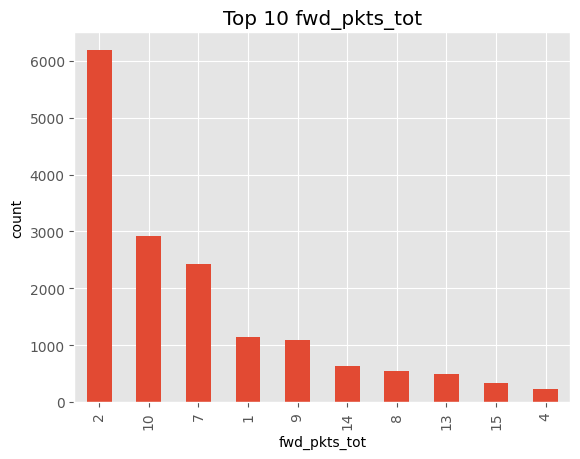

In [30]:
ax = df['fwd_pkts_tot'].value_counts() \
    .head(10) \
    .plot(kind='bar', title='Top 10 fwd_pkts_tot')

ax.set_xlabel('fwd_pkts_tot')
ax.set_ylabel('count')

Text(0, 0.5, 'count')

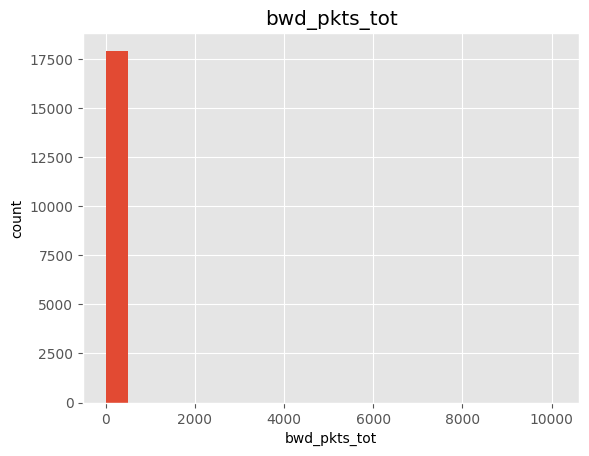

In [31]:
ax = df['bwd_pkts_tot'].plot(kind='hist', bins=20, title="bwd_pkts_tot")
ax.set_xlabel('bwd_pkts_tot')
ax.set_ylabel('count')

Text(0, 0.5, 'count')

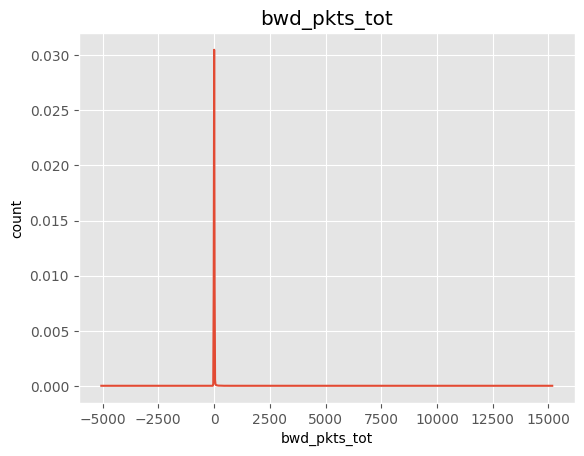

In [32]:
ax = df['bwd_pkts_tot'].plot(kind='kde', title="bwd_pkts_tot")

ax.set_xlabel('bwd_pkts_tot')
ax.set_ylabel('count')

## Feature Relationships
- Scatterplot
- Heartmap Correlation
- Pairplot
- Groupby comparisons

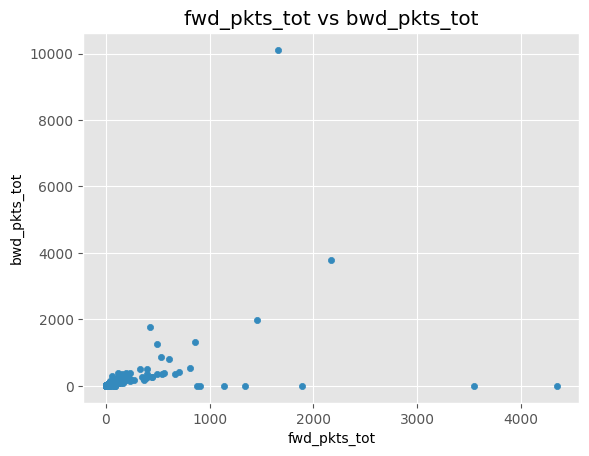

In [33]:
df.plot(kind='scatter', 
        x='fwd_pkts_tot', 
        y='bwd_pkts_tot', 
        title='fwd_pkts_tot vs bwd_pkts_tot')

plt.show()

<Axes: xlabel='fwd_pkts_payload.max', ylabel='fwd_pkts_payload.min'>

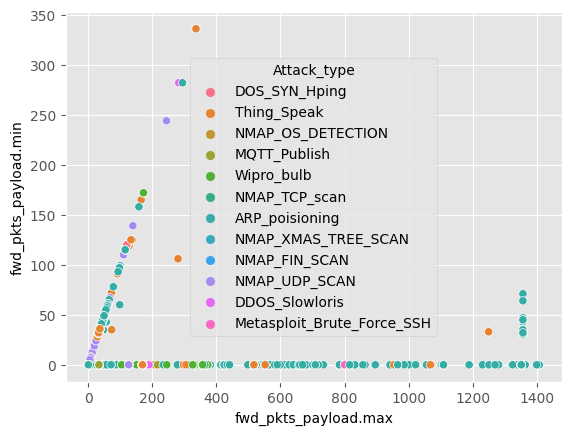

In [34]:
sns.scatterplot(x='fwd_pkts_payload.max',
                y='fwd_pkts_payload.min', 
                hue='Attack_type',
                data=df)

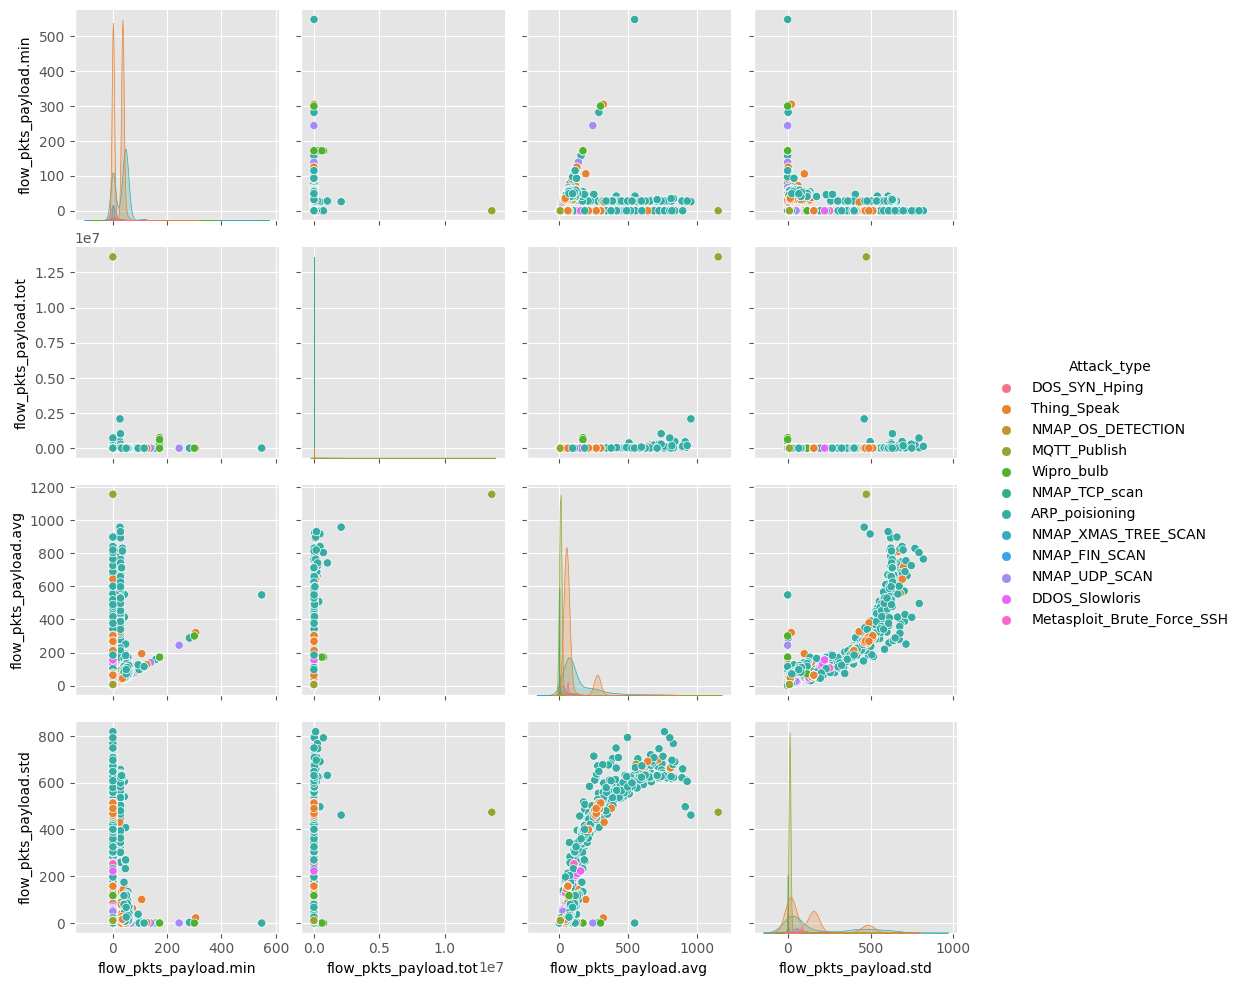

In [35]:
sns.pairplot(hue='Attack_type',
             data=df,
            vars=['flow_pkts_payload.min',
       'flow_pkts_payload.tot', 'flow_pkts_payload.avg',
       'flow_pkts_payload.std'])

plt.show()

In [36]:
df_corr = df[['flow_pkts_payload.min',
       'flow_pkts_payload.tot', 'flow_pkts_payload.avg',
       'flow_pkts_payload.std']] \
    .dropna() \
    .corr()

df_corr

,flow_pkts_payload.min,flow_pkts_payload.tot,flow_pkts_payload.avg,flow_pkts_payload.std
flow_pkts_payload.min,1.000000,-0.008588,0.087012,-0.258441
flow_pkts_payload.tot,-0.008588,1.000000,0.180158,0.089429
flow_pkts_payload.avg,0.087012,0.180158,1.000000,0.877586
flow_pkts_payload.std,-0.258441,0.089429,0.877586,1.000000


<Axes: >

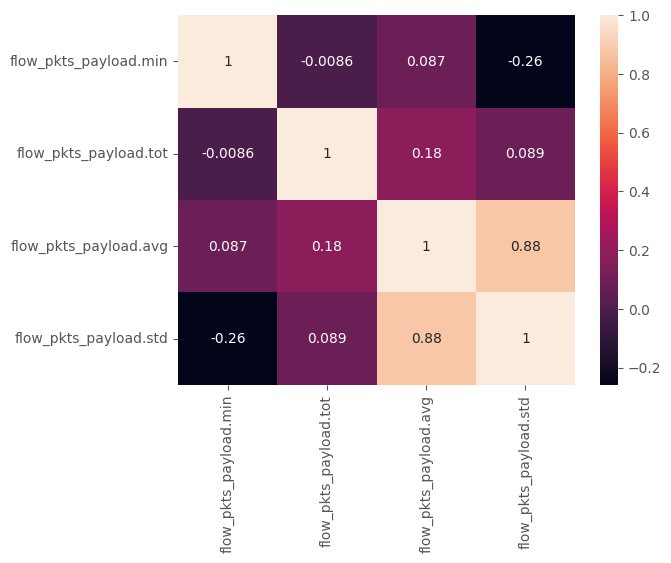

In [37]:
sns.heatmap(df_corr, annot=True)